In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("/kaggle/input/dataset-csv/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [10]:
df.shape

(27, 2)

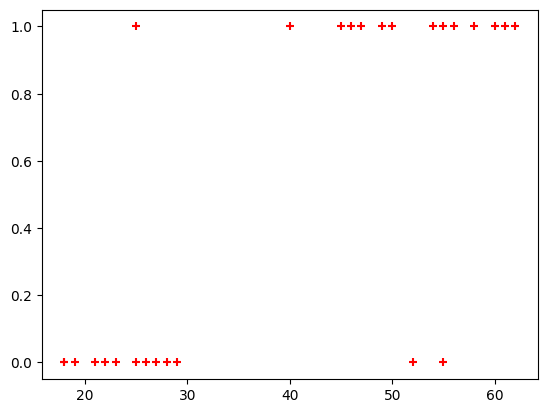

In [8]:
plt.scatter(df['age'], df['bought_insurance'], marker = '+', color = 'red')

# As you can see the plot, we can't actually draw a line because the data is distributed on top and bottom

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((21, 1), (6, 1))

In [14]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)

y_pred, y_test

# As you can see, the model is getting every answers right

(array([1, 0, 1, 0, 0, 0]),
 8     1
 13    0
 9     1
 21    0
 0     0
 11    0
 Name: bought_insurance, dtype: int64)

In [27]:
model.score(X_test, y_test)

# Our model is perfect

1.0

In [23]:
age_sorted = np.sort(df.age)

probabilities = model.predict_proba(age_sorted.reshape(-1, 1))[:, 1]
probabilities

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.1073847 , 0.1073847 , 0.11871444, 0.14448766, 0.15903454,
       0.17474682, 0.20978901, 0.20978901, 0.22914939, 0.24973178,
       0.27151175, 0.29444574, 0.59144934, 0.71815862, 0.740472  ,
       0.76160524, 0.80021757, 0.81768362, 0.84901371, 0.87577782,
       0.88756613, 0.88756613, 0.8983656 , 0.91723431, 0.93286179,
       0.93960657, 0.94571319])

In [32]:
age_sorted.reshape(-1, 1)

# this is the 2D array, that we had to give to the predict_proba()

array([[18],
       [18],
       [19],
       [21],
       [22],
       [23],
       [25],
       [25],
       [26],
       [27],
       [28],
       [29],
       [40],
       [45],
       [46],
       [47],
       [49],
       [50],
       [52],
       [54],
       [55],
       [55],
       [56],
       [58],
       [60],
       [61],
       [62]])

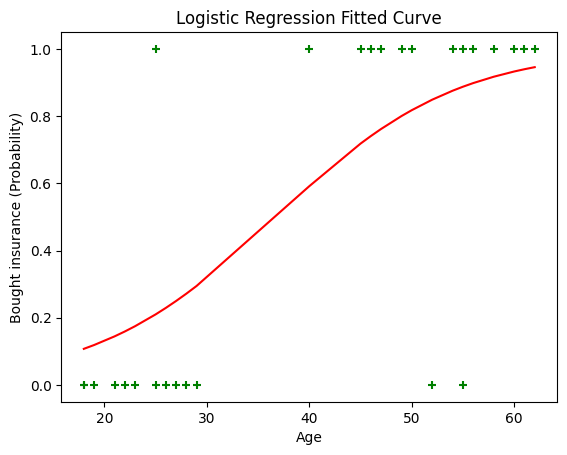

In [33]:
plt.xlabel("Age")
plt.ylabel("Bought insurance (Probability)")
plt.scatter(df.age, df.bought_insurance, marker = '+', color = 'green', label='Actual Data')

plt.plot(age_sorted, probabilities, color = "red", label='Logistic Regression Curve')

plt.title('Logistic Regression Fitted Curve')
plt.show()